In [1]:
from qwak.qwak import QWAK

In [2]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
from scipy.linalg import expm

In [3]:
n = 201
t = 20
graph = nx.cycle_graph(n)
marked = [n//2]

In [4]:
qwController = QWAK(graph, laplacian=False)
qwController.runWalk(t, marked)

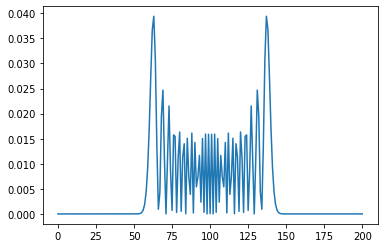

In [5]:
plt.plot(qwController.getProbDistVec())
plt.show()

In [6]:
def stream_path(n,alpha):
    B = np.matrix(np.zeros((n,n), dtype='complex'))
    for x in range(n-1):
        B[x,x+1] = np.exp(1j*alpha)
    
    return B + B.H

def inf_line_bessel(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')
    
    for x in range(2*nx + 1):
        psi[x,0] = 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)/np.sqrt(2)
        psi[x,0] += 1j**(np.abs(domain[x]-x0-1))*sp.jv(np.abs(domain[x] - x0 - 1), 2*t)/np.sqrt(2)
        
    return np.abs(np.array(psi))**2

[[0.000000e+00+0.j 6.123234e-17+1.j 0.000000e+00+0.j 0.000000e+00+0.j
  0.000000e+00+0.j]
 [6.123234e-17-1.j 0.000000e+00+0.j 6.123234e-17+1.j 0.000000e+00+0.j
  0.000000e+00+0.j]
 [0.000000e+00+0.j 6.123234e-17-1.j 0.000000e+00+0.j 6.123234e-17+1.j
  0.000000e+00+0.j]
 [0.000000e+00+0.j 0.000000e+00+0.j 6.123234e-17-1.j 0.000000e+00+0.j
  6.123234e-17+1.j]
 [0.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j 6.123234e-17-1.j
  0.000000e+00+0.j]]

[[6.123234e-17-1.j]]
[(0, 1, {'weight': (6.123233995736766e-17+1j)}), (1, 2, {'weight': (6.123233995736766e-17+1j)}), (2, 3, {'weight': (6.123233995736766e-17+1j)}), (3, 4, {'weight': (6.123233995736766e-17+1j)})]


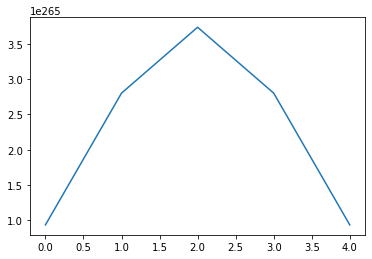

In [53]:
n=5
x0 = 0
n1 = 100
t  = 20
alpha=np.pi/2
print(stream_path(n,alpha))
print()
graph = nx.path_graph(n)
for u,v,d in graph.edges(data=True):
    d["weight"] = np.exp(1j*(np.pi/2))
    mat = np.matrix(d["weight"])
print(mat.H)

print( graph.edges(data=True))
qw2 = QWAK(graph)
qw2.runWalk(177,[n//2,n//2 +1])
plt.plot(qw2.getProbDistVec())
# print(qw2.getAdjacencyMatrix())
# print()
# print(np.matrix.round(qw2.getAdjacencyMatrix()) == np.matrix.round(stream_path(n,alpha)))

# psi_bessel = inf_line_bessel(x0,n1,t,alpha)
# plt.plot(psi_bessel)